#  Syandilya Sai Vardhan
# 21BCE9037

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
d=pd.read_csv("Titanic-Dataset.csv")
d.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
d.shape

(891, 12)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Checking for Null Values 

In [6]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
d=d.drop('Cabin',axis=1)

In [8]:
d.shape

(891, 11)

In [9]:
d.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
d.Embarked.mode()[0]

'S'

In [11]:
d.Embarked[d.Embarked.isnull()]=d.Embarked.mode()[0]

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\4005408966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Embarked[d.Embarked.isnull()]=d.Embarked.mode()[0]


In [12]:
d.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
d.Age[d.Age.isnull()]=d.Age.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\3571067830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Age[d.Age.isnull()]=d.Age.mean()


In [14]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
d.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#  Data Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

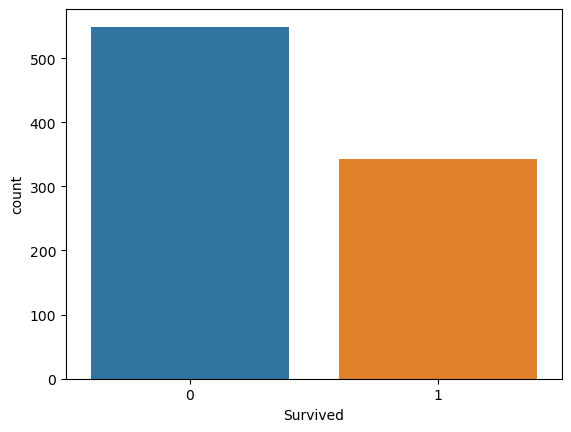

In [16]:
sns.countplot(x=d.Survived)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

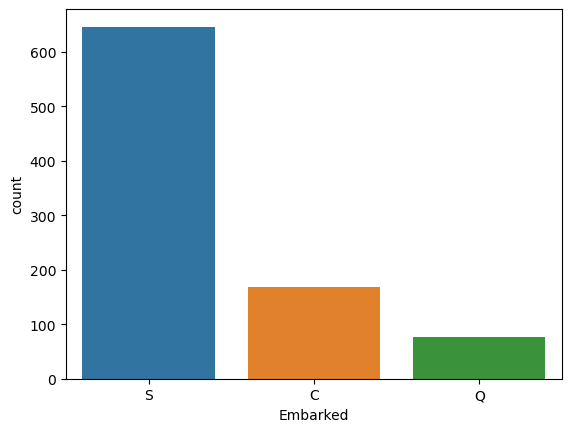

In [17]:
sns.countplot(x=d.Embarked)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

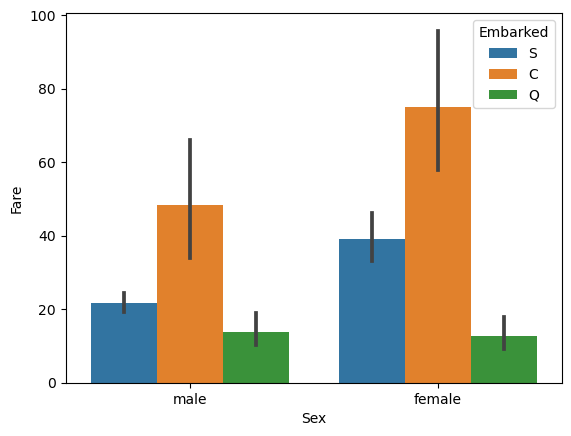

In [18]:
sns.barplot(x='Sex',y='Fare',hue='Embarked',data=d)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

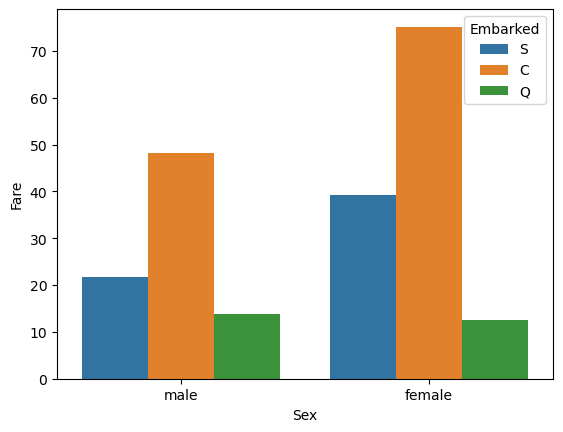

In [19]:
sns.barplot(x='Sex',y='Fare',hue='Embarked',data=d,ci=None)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

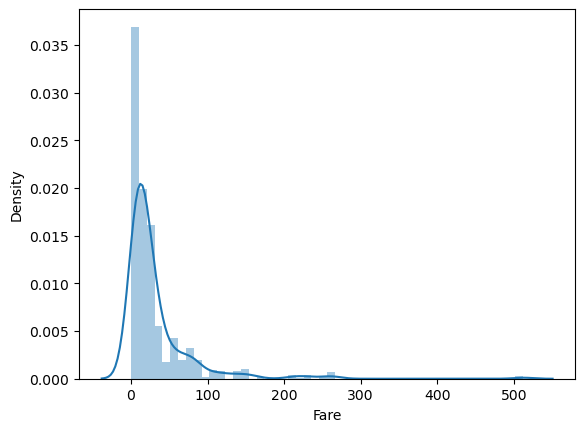

In [20]:
sns.distplot(d.Fare)

# Outliers 

In [21]:
d.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


<AxesSubplot:ylabel='PassengerId'>

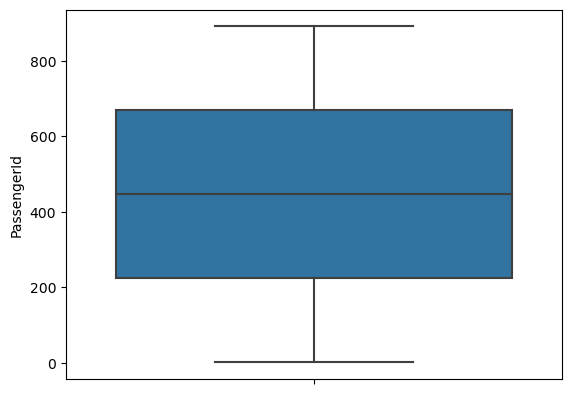

In [22]:
sns.boxplot(y='PassengerId',data=d)

<AxesSubplot:ylabel='Survived'>

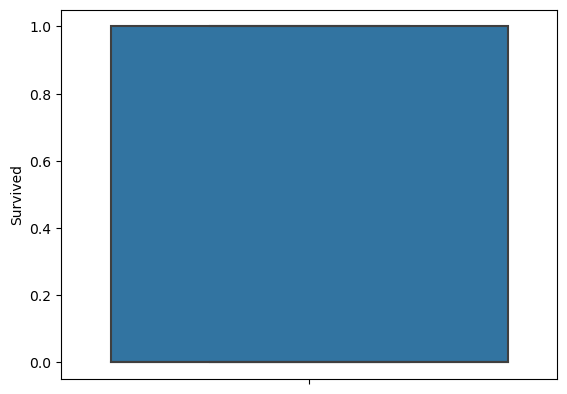

In [23]:
sns.boxplot(y='Survived',data=d)

<AxesSubplot:ylabel='Pclass'>

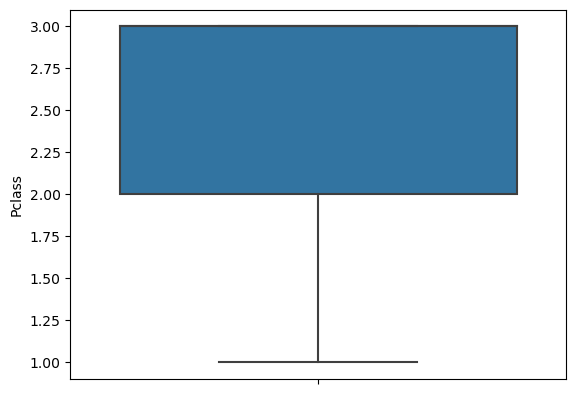

In [24]:
sns.boxplot(y='Pclass',data=d)

<AxesSubplot:ylabel='SibSp'>

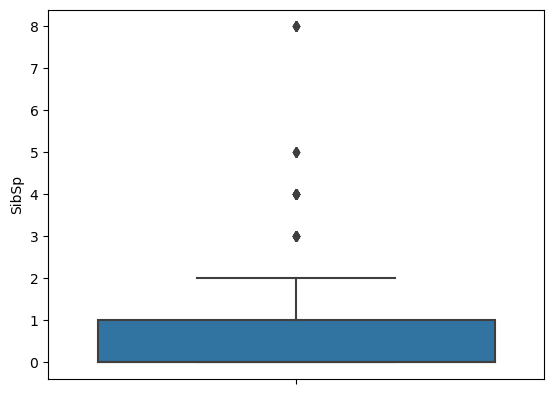

In [25]:
sns.boxplot(y='SibSp',data=d)

In [26]:
# SibSp
q3=d['SibSp'].quantile(0.75)
q1=d['SibSp'].quantile(0.25)
iqr=q3-q1
d.SibSp[d['SibSp']>(q3+iqr)]=d.SibSp.median()

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\374006673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.SibSp[d['SibSp']>(q3+iqr)]=d.SibSp.median()


<AxesSubplot:ylabel='SibSp'>

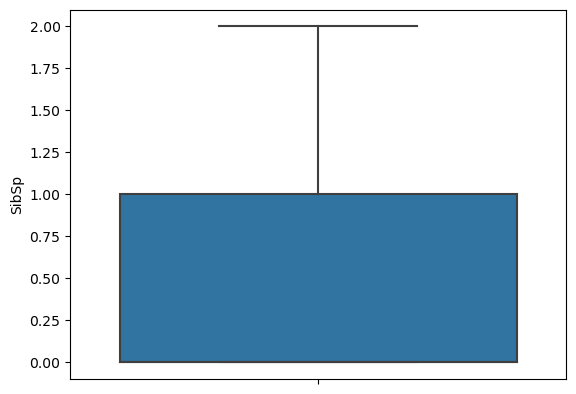

In [27]:
sns.boxplot(y='SibSp',data=d)

<AxesSubplot:ylabel='Parch'>

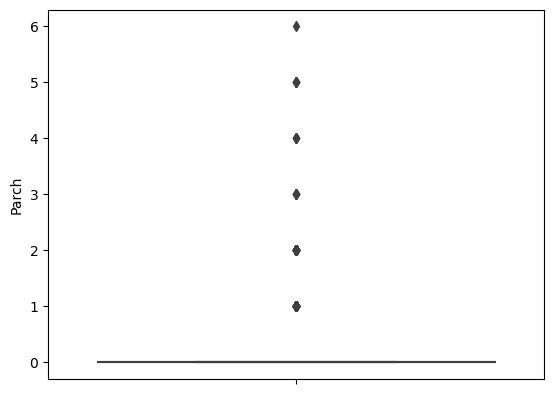

In [28]:
sns.boxplot(y='Parch',data=d)

In [29]:
# Parch
q3=d['Parch'].quantile(0.75)
q1=d['Parch'].quantile(0.25)
iqr=q3-q1
d.Parch[d['Parch']>(q3+iqr)]=d.Parch.median()

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\1940097364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Parch[d['Parch']>(q3+iqr)]=d.Parch.median()


<AxesSubplot:ylabel='Parch'>

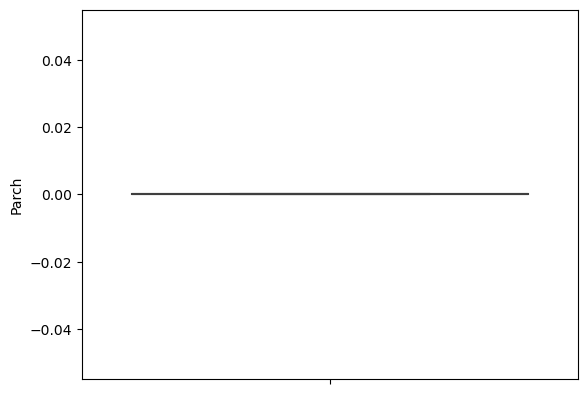

In [30]:
sns.boxplot(y='Parch',data=d)

<AxesSubplot:ylabel='Fare'>

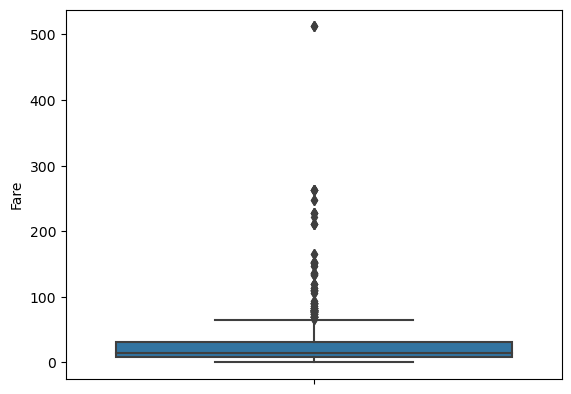

In [31]:
sns.boxplot(y='Fare',data=d)

In [32]:
# Fare
q3=d['Fare'].quantile(0.75)
q1=d['Fare'].quantile(0.25)
iqr=q3-q1
d.Fare[d['Fare']>=(q3+iqr)]=d.Fare.median()

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\148560116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Fare[d['Fare']>=(q3+iqr)]=d.Fare.median()


<AxesSubplot:ylabel='Fare'>

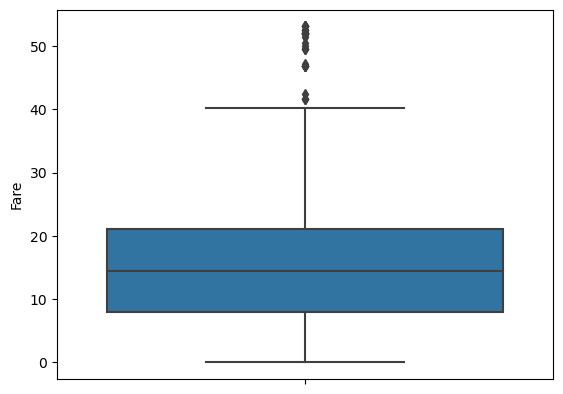

In [33]:
sns.boxplot(y='Fare',data=d)

In [36]:
# Fare
q3=d['Fare'].quantile(0.75)
q1=d['Fare'].quantile(0.25)
iqr=q3-q1
d.Fare[d['Fare']>=(q3+iqr)]=d.Fare.median()

C:\Users\hp\AppData\Local\Temp\ipykernel_13120\148560116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Fare[d['Fare']>=(q3+iqr)]=d.Fare.median()


<AxesSubplot:ylabel='Fare'>

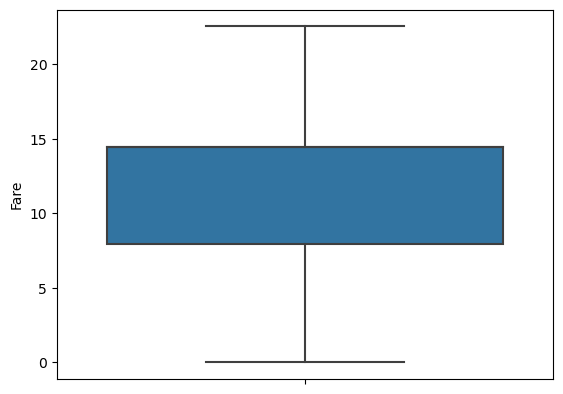

In [37]:
sns.boxplot(y='Fare',data=d)

In [38]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,14.4542,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Splitting data into dependent and independnet

In [63]:
y=d.iloc[:,1]
x=d.drop('Survived',axis=1)

In [41]:
x.shape

(891, 10)

In [42]:
y.shape

(891,)

# Encoding 

In [43]:
from sklearn.preprocessing import LabelEncoder

In [49]:
l=LabelEncoder()

In [52]:
d.Sex=l.fit_transform(d.Sex)

In [53]:
d.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [54]:
d.Embarked=l.fit_transform(d.Embarked)

In [55]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,14.4542,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,14.4542,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [64]:
x=x.drop('Name',axis=1)

In [65]:
x=x.drop('Ticket',axis=1)

In [66]:
x=x.drop('Embarked',axis=1)

In [67]:
x=x.drop('Sex',axis=1)

#  Splitting data into train and test data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
print("X-train = ",x_train.shape)
print("X-test = ",x_test.shape)
print("Y-train = ",y_train.shape)
print("Y-test = ",y_test.shape)

X-train =  (712, 6)
X-test =  (179, 6)
Y-train =  (712,)
Y-test =  (179,)


#  Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [74]:
x_train=s.fit_transform(x_train)
x_test=s.fit_transform(x_test)

In [75]:
x_train

array([[-0.74621422,  0.8182761 ,  0.03556669, -0.5844312 ,  0.        ,
        -1.2132411 ],
       [ 1.02557288,  0.8182761 , -0.34903558, -0.5844312 ,  0.        ,
        -1.07943837],
       [-0.51074796, -1.56948039, -2.20128007,  1.35098748,  0.        ,
         0.65880589],
       ...,
       [-1.1746856 , -0.37560215, -0.04135377,  1.35098748,  0.        ,
         0.65880589],
       [ 0.55850046, -0.37560215,  1.88165754, -0.5844312 ,  0.        ,
         0.65880589],
       [ 1.67407011, -1.56948039,  1.34321437,  1.35098748,  0.        ,
         0.65880589]])

In [76]:
x_test

array([[ 1.05284767,  0.86450972,  1.36338018,  1.33666197,  0.        ,
         0.64058649],
       [-1.29597582, -1.55341591,  1.59500477, -0.51808604,  0.        ,
         0.64058649],
       [ 0.19174715, -1.55341591,  1.05454739, -0.51808604,  0.        ,
         0.64058649],
       ...,
       [ 1.03667677, -0.34445309, -0.04959796, -0.51808604,  0.        ,
        -2.92321915],
       [ 0.42622522, -1.55341591,  0.6685064 ,  1.33666197,  0.        ,
         0.64058649],
       [-1.84174376, -0.34445309,  0.35967361, -0.51808604,  0.        ,
         0.64058649]])